This notebook is part of the Metaheuristic class, written by Plobner Guillaume, Puydebois Etienne and Savigneux Melchior<br>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Shuffled Frog Leaping Algorithm</div>

<br>

1. [Shuffled Frog Leaping Algorithm](#sec1)
2. [Application in solving 01 knapsack problem](#sec2)

## 1. <a id="sec1"></a> Shuffled Frog Leaping Algorithm

In this notebook we take a very practical approach. For a more thorough and rigorous presentation, see (for instance) the reference below.<br>
**Shuffled frog leaping algorithm and its application to 0/1 knapsack problem**<br>
Kaushik Kumar Bhattacharjee, S.P. Sarmah. *Department of Industrial Engineering and Management, Indian Institute of Technology, Kharagpur, WB 721302, India*, (2014).

The Shuffled Frog Leaping method is based on observing, imitating and modelling the behaviour of a group of frogs when searching for a specific location.

<img src="SFA.png" width="600px">


The population consists of a set of frogs (solutions), **partitioned into subsets, called memeplexes**. The different memeplexes are performing a **local search**. Within each memeplex, a frog can be influenced by the others, and evolve through a process of memetic evolution. Then, frogs are passed among memeplexes in a **shuffling process**. The local search and the shuffling processes continue until a **convergence criteria** is satisfied.
<br><br>

To get into details, an **initial population of frogs is created randomly**. A frog i (a solution) is represented as :<br> 

$$X_{i} =(x_{i,1}, x_{i,2}, ..., x_{i,j})$$ 

Afterwards, the frogs are **sorted in a descending order** according to their fitness. Then, the population is divided into m memeplexes, each containing n frogs. As described by the drawing, the first frog goes to the first memeplex, the second frog goes to the second memeplex, frog m goes to the $m^{th}$ memeplex, and frog m+1 goes back to the first memeplex, and so on.

<img src="partitioned_memeplexes.png" width="500px">

**Local Search**

Within each memeplex, the frogs with the best and the worst fitnesses are identified as $X_{b}$ and $X_{w}$ , respectively. Also, the frog with the global best fitness is identified as $X_{g}$. Then, a process is applied to improve only the frog with the worst fitness (not all frogs) in each cycle. Accordingly, the position of the frog with the worst fitness is adjusted as follows:

$$D_{i} = Rand()\times(X_{b}-X_{w}),$$

where $Rand()$ is a random number between 0 and 1, and $D_{i}$ is the change in the $i^{th}$ frog position and new position is given by: 

$$X_{w}(new) = X_{w} + D_{i}\\
-D_{max} \leq D_{i} \leq D_{max},$$

where $D_{max}$ is the maximum allowed change in a frog position. If this process produces a better solution, it replaces the worst frog. Otherwise, calculations above are repeated but with respect to the global best frog (i.e. $X_{g}$ replaces $X_{b}$). If no improvement possible in this case, then a new solution is randomly generated to replace that frog. The calculations then continue for a specific number of iterations. As mentionned previously, memeplexes are then combined in a shuffling process, and the local search and the shuffling processes continue until a convergence criteria is satisfied.

**The pseudocode for the Shuffled Frog Leaping Algorithm (discrete) is given below.**



<pre><code>
<div class="alert alert-warning">
**Pseudocode for Shuffled Frog Leaping Algorithm** 


Generate random population of solutions (frogs)
**for** each individual i in population **do**: 
    calculate fitness(i) 
**end for**
Sort the population in descending order of their fitness 
Divide the population into m memeplexes
**for** each memeplex **do**
    **LOCAL SEARCH**
    Determine the best and worst frogs
    Improve the worst frog position
    Repeat for a specific number of iterations
**end for**
**SHUFFLING PROCESS**
Combine the evolved memeplexes
Sort the population in descending order of their fitness
**if** criteria is satisfied **then**
    Return best solution
**end if**
</div>
</pre></code>


<img src="algo_shuffled.png" width="400px">

<table><tr><td>***Fig. 1 Flowchart Shuffled Frog Leaping Algorithm*** </td></tr></table>




<div class="alert alert-success">
Process of Shuffled frog Leaping.
<ul>
<li> Population consists in a set of frogs (solutions)
<li> Partioned into subsets referred as memeplexes
<li> Each memplex are performing a local search
<li> The local search and the suffling processes continue until defined criteria is satisfied 
</ul>
</div>

# 2. <a id="sec2"></a>Application in solving 01 knapsack problem



In [1]:
import numpy as np
from matplotlib import pyplot as plt

**Datasets**

In [2]:
#f1 : dimension 10 : nb bag = 2**10 = 1024
w_f1 = [95, 4, 60, 32, 23, 72, 80, 62, 65, 46] 
p_f1 = [55, 10, 47, 5, 4, 50, 8, 61, 85, 87]
b_f1 = 269.

#f2 : dimension 20 : nb bag = 2**20 = 1048576
w_f2 = [92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]
p_f2 = [44, 46, 90, 72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
b_f2 = 878.

#f3 : dimension 4 : nb bag = 2**4 = 16
w_f3 = [6, 5, 9, 7]
p_f3 = [9, 11, 13, 15]
b_f3 = 20.

#f4 : dimension 4 : nb bag = 2**4 = 16
w_f4 = [2, 4, 6, 7]
p_f4 = [6, 10, 12, 13]
b_f4 = 11.

#f5 : dimension 15 : nb bag = 2**15 = 32768
w_f5 = [56.358531, 80.87405, 47.987304, 89.59624, 74.660482, 85.894345, 51.353496, 1.498459, 36.445204, 16.589862, 44.569231, 0.466933, 37.788018, 57.118442, 60.716575]
p_f5 = [0.125126, 19.330424, 58.500931, 35.029145, 82.284005, 17.41081, 71.050142, 30.399487, 9.140294, 14.731285, 98.852504, 11.908322, 0.89114, 53.166295, 60.176397]
b_f5 = 375.


#f6 : dimension 10 : nb bag = 2**10 = 1024
w_f6 = [30, 25, 20, 18, 17, 11, 5, 2, 1, 1]
p_f6 = [20, 18, 17, 15, 15, 10, 5, 3, 1, 1]
b_f6 = 60.

#f7 : dimension 7 : nb bag = 2**7 = 128
w_f7 = [31, 10, 20, 19, 4, 3, 6]
p_f7 = [70, 20, 39, 37, 7, 5, 10]
b_f7 = 50.

#f8 : dimension 23 : nb bag = 2**23 = 8388608
w_f8 = [983, 982, 981, 980, 979, 978, 488, 976, 972, 486, 486, 972, 972, 485, 485, 969, 966, 483, 964, 963, 961, 958, 959]
p_f8 = [81,980, 979, 978, 977, 976, 487, 974, 970, 485, 485, 970, 970, 484, 484, 976, 974, 482, 962, 961, 959, 958, 857]
b_f8 = 10000.

#f9 : dimension 5 : nb bag = 2**5 = 32
w_f9 = [15, 20, 17, 8, 31]
p_f9 = [33, 24, 36, 37, 12]
b_f9 = 80.

#f10 : dimension 20 : nb bag 2**20 = 1048576
w_f10 = [84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92]
p_f10 = [91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44]
b_f10 = 879.

**Solutions**

In [3]:
#f1 : solution : 
sol_f1 = ([0,1,1,1,0,0,0,1,1,1], 295) 

#f2 : solution : 
sol_f2 = ([1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1], 1024)

#f3 : solution : 
sol_f3 = ([1,1,0,1], 35)
#f4 : solution : 
sol_f4 = ([0,1,0,1], 23)

#f5 : solution : 
sol_f5 = ([0,0,1,0,1,0,1,1,0,1,1,1,0,1,1], 481.0694)

#f6 : solution : 
sol_f6 = ([0,0,1,0,1,1,1,1,1,1], 52)

#f7 : solution : 
sol_f7 = ([1,0,0,1,0,0,0], 107)

#f8 : solution : 
sol_f8 = ([1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0], 9767)

#f9 : solution : 
sol_f9 = ([1,1,1,1,0], 130)

#f10: solution : 
sol_f10 = ([1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1], 1025)

**Choix du problème et définition des paramètres**

In [4]:
################### You only have to touch this cell variables to change the setting
#### MAIN CELL #### When you're ready, just run all the cells
################### Go to the end of the notebook to check results

#choose your problem number here 
num_of_problem = 2

# define all the global problem parameters
weight = globals()['w_f'+str(num_of_problem)]
profit = globals()['p_f'+str(num_of_problem)]
object_number = len(profit)
max_weight = globals()['b_f'+str(num_of_problem)]
solution = globals()['sol_f'+str(num_of_problem)]

####################
# HYPER PARAMETRES #
####################

iteration_limit = 5                      # nombre limite d'iteration globales (critere d'arret)
memeplexe_iterations = 20                  # nombre de 'sous' d'iterations 

bag_number = 100                            # nombre de sacs 
memeplexe_number = 10                       # nombre de sous-ensembles
memeplexe_size = 10                         # taille des sous ensembles

pm = 0.1                                  # proba de muter le sac i a chaque iteration
max_mutate_index = bag_number              # doit etre inf ou egal a bag_number (entier)
min_mutate_index = 0 #np.int(bag_number/2) # doit etre entre 0 et max_mutate_number (entier)
nb_object_max = int(object_number/4)       # nombre d'objets mutés sur les bag 'mutants'

min_random = 0                             # valeur de D minimale ( borne inf loi uniforme)
max_random = 1                             # valeur de D maximale ( borne sup loi uniforme)

**Quelques fonctions...**

In [5]:
#Calcul du poids d'un sac
def weight_of(bag):
    return np.vdot(bag,weight)

#Calcul du profit d'un sac
def profit_of(bag):
    return np.vdot(bag,profit)

#Calcul du profit d'un sac avec penalisation
#def profit_of_penalize(bag):
#    rho = []
#    for i in range(len(profit)):
#        rho.append(profit[i]/weight[i])
#    rho_max = np.max(rho)
#    return np.vdot(bag,profit) - rho_max*(weight_of(bag) - max_weight)
#solution_penalize = (solution[0], profit_of_penalize(solution[0]))

#Trier les sacs en fonction de leur profit
def sort_bag(bag_list):
    bag_list.sort(key=lambda x : -x[1])
    return bag_list

#Création d'une liste de sacs
def create_bag_list(bag_number):
    bag_list = []

    for i in range(bag_number):
        bag_weight = max_weight+1
        while bag_weight>max_weight:
            new_bag = np.random.randint(2, size=(1,object_number)).tolist()[0]
            bag_weight = weight_of(new_bag)
        
        #Evaluate profit of the new bag
        bag_profit = profit_of(new_bag)
        bag_list.append((new_bag, bag_profit))
    return sort_bag(bag_list)

In [6]:
#Création d'un dictionnaire - key : memeplex_number, value : memeplexes sorted in descending order by profit -
def create_dict(bag_list,memeplexe_number):
    memeplexe_set = {}
    for i in range(memeplexe_number):
        memeplexe_i = []
        for j in range(memeplexe_size):
            memeplexe_i.append(bag_list[i+j*memeplexe_number])
        sort_bag(memeplexe_i)
        memeplexe_set.update({i : memeplexe_i})
    return memeplexe_set

bag_list = create_bag_list(bag_number)
memeplexe_set = create_dict(bag_list, memeplexe_number) 
for i in range(memeplexe_number):
    print(memeplexe_set[i][0])

([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], 881)
([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], 782)
([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1], 779)
([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], 775)
([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], 774)
([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], 772)
([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 764)
([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], 754)
([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], 716)
([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], 714)


In [7]:
#Améliorer le mauvais sac
def update_object_i(i,best_memeplexe_bag,bad_memeplexe_bag):
    rand = np.random.uniform(min_random,max_random)
    D = np.round(rand*(best_memeplexe_bag[0][i]-bad_memeplexe_bag[0][i]))
    t = D + bad_memeplexe_bag[0][i]
    if t<=0: bad_memeplexe_bag[0][i]= 0
    elif t>0 and t<1: bad_memeplexe_bag[0][i]= np.round(t)
    elif t>=1: bad_memeplexe_bag[0][i]= 1
    
#Mettre à jour le memeplexe en améliorer les mauvais sac
def update_bad_bag(memeplexe):
    best_memeplexe_bag = memeplexe[0]
    bad_memeplexe_bag = memeplexe[-1]
    print('\nbag:', bad_memeplexe_bag)
    bag_w = max_weight+1
    while bag_w>max_weight:
        for i in range(object_number):
            update_object_i(i,best_memeplexe_bag,bad_memeplexe_bag) 
        bag_w = weight_of(bad_memeplexe_bag[0])
    memeplexe[-1] = (bad_memeplexe_bag[0], profit_of(bad_memeplexe_bag[0]))
    print('was replaced by:')
    print('bag:', memeplexe[-1])
    print('\n')
    memeplexe = sort_bag(memeplexe)

In [8]:
def improve_memeplexe(memeplexe,memeplexe_iterations):
    profits_initial=[]
    for bag in memeplexe:
        profits_initial.append(bag[1])
    print('profits:',profits_initial)
    
    for i in range(memeplexe_iterations):
        update_bad_bag(memeplexe)
        memeplexe = sort_bag(memeplexe)
        profit=[]
        
        for bag in memeplexe:
            profit.append(bag[1])
        print('new profits:',profit)

def improve_all_memeplexe(memeplexe_set,memeplexe_iterations):
    for key in range(memeplexe_number):
        print('\n########## MEMEPLEXE '+str(key)+' ##########\n')
        improve_memeplexe(memeplexe_set[key],memeplexe_iterations)

#Mutation avec probabilité
def mutate(bag,pm,nb_object_max):
    if np.random.uniform(0,1)<pm:
        weight_of_bag = max_weight+1
        while weight_of_bag>max_weight:
            for i in range(nb_object_max):
                object_to_mutate = np.random.randint(0,10)
                bag[0][object_to_mutate]=abs(bag[0][object_to_mutate]-1)
            bag = (bag[0], profit_of(bag[0]))
            weight_of_bag = weight_of(bag[0])
    return bag

**Résolution du problème 01 knapsack**

In [9]:
i=0

# plots data initialisation
bad_bag_profit_list = [bag_list[-1][1]]
best_bag_profit_list = [bag_list[0][1]]
bad_bag_weight_list = [weight_of(bag_list[-1][0])]
best_bag_weight_list = [weight_of(bag_list[0][0])]

# main algorithm structure :
while i < iteration_limit:
    
    print('\n#########################################')
    print('#########################################')
    print('########### ITERATION '+str(i)+' #################')
    print('#########################################')
    print('#########################################')
    
    #print('\n')
    #for bag in bag_list:
    #    print(bag[1])
    
    # intra groups iterations
    improve_all_memeplexe(memeplexe_set,memeplexe_iterations)
    
    # 'deshuffleing'
    new_bag_list = []
    for j in range(memeplexe_number):
        for bag in memeplexe_set[j]:
            new_bag_list.append(bag)
    
    # resorting new bags 
    bag_list = sort_bag(new_bag_list)
    
    # add data to data lists
    bad_bag_profit_list.append(bag_list[-1][1])
    best_bag_profit_list.append(bag_list[0][1])
    bad_bag_weight_list.append(weight_of(bag_list[-1][0]))
    best_bag_weight_list.append(weight_of(bag_list[0][0]))
    
    # mutate some bags according to hyperparameters settings
    for bag_index in range(min_mutate_index,max_mutate_index):
        bag_list[bag_index] = mutate(bag_list[bag_index],pm,nb_object_max)
    
    # reshuffleing
    memeplexe_set = create_dict(bag_list, memeplexe_number) 
    i+=1


#########################################
#########################################
########### ITERATION 0 #################
#########################################
#########################################

########## MEMEPLEXE 0 ##########

profits: [881, 704, 641, 616, 579, 540, 498, 460, 428, 346]

bag: ([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], 346)
was replaced by:
bag: ([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], 658)


new profits: [881, 704, 658, 641, 616, 579, 540, 498, 460, 428]

bag: ([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0], 428)
was replaced by:
bag: ([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 649)


new profits: [881, 704, 658, 649, 641, 616, 579, 540, 498, 460]

bag: ([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 460)
was replaced by:
bag: ([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], 736)


new profits: [881, 736, 704, 658, 649, 641, 616, 579, 540, 498]

ba

was replaced by:
bag: ([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 654)


new profits: [823, 823, 806, 783, 733, 731, 716, 687, 670, 654]

########## MEMEPLEXE 9 ##########

profits: [714, 646, 620, 588, 548, 500, 463, 431, 350, 161]

bag: ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], 161)
was replaced by:
bag: ([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 297)


new profits: [714, 646, 620, 588, 548, 500, 463, 431, 350, 297]

bag: ([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 297)
was replaced by:
bag: ([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], 489)


new profits: [714, 646, 620, 588, 548, 500, 489, 463, 431, 350]

bag: ([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1], 350)
was replaced by:
bag: ([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], 551)


new profits: [714, 646, 620, 588, 551, 548, 500, 489, 463, 431]

bag: ([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

was replaced by:
bag: ([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 791)


new profits: [897, 883, 883, 881, 868, 847, 838, 836, 823, 791]

bag: ([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 791)
was replaced by:
bag: ([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 791)


new profits: [897, 883, 883, 881, 868, 847, 838, 836, 823, 791]

########## MEMEPLEXE 8 ##########

profits: [881, 823, 797, 782, 772, 754, 730, 718, 710, 654]

bag: ([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 654)
was replaced by:
bag: ([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1], 819)


new profits: [881, 823, 819, 797, 782, 772, 754, 730, 718, 710]

bag: ([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], 710)
was replaced by:
bag: ([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 668)


new profits: [881, 823, 819, 797, 782, 772, 754, 730, 718, 668]

bag: ([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

bag: ([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 823)


new profits: [970, 943, 897, 895, 881, 868, 838, 836, 823, 803]

bag: ([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1], 803)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 912)


new profits: [970, 943, 912, 897, 895, 881, 868, 838, 836, 823]

bag: ([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 823)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 895)


new profits: [970, 943, 912, 897, 895, 895, 881, 868, 838, 836]

bag: ([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], 836)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 999)


new profits: [999, 970, 943, 912, 897, 895, 895, 881, 868, 838]

bag: ([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], 838)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], 922)


new p

was replaced by:
bag: ([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 1009)


new profits: [1009, 1009, 1009, 1009, 1009, 1009, 999, 999, 999, 970]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 970)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


new profits: [1024, 1009, 1009, 1009, 1009, 1009, 1009, 999, 999, 999]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 999)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


new profits: [1024, 1024, 1009, 1009, 1009, 1009, 1009, 1009, 999, 999]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 999)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 999)


new profits: [1024, 1024, 1009, 1009, 1009, 1009, 1009, 1009, 999, 999]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 999)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 



new profits: [1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


new profits: [1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


new profits: [1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


new profits: [1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]

bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
was replaced by:
bag: ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


new profits: [1024, 1024, 1024

In [10]:
print('\nBest bag of each memeplexe after the last iteration:\n')
for h in range(memeplexe_number):
    if h ==0: best_bag = memeplexe_set[h][0]
    print('memeplexe '+str(h)+' :',memeplexe_set[h][0])
    
print('\nBest reachable solution : ',solution)

print('\n')
print('Weight of the best found solution: ', weight_of(best_bag[0]))
print('Weight of the best foundable solution: ', weight_of(solution[0]))
print('Max. authorized weight: ', max_weight)


Best bag of each memeplexe after the last iteration:

memeplexe 0 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 1 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 2 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 3 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 4 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 5 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 6 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 7 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 8 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)
memeplexe 9 : ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)

Best reachable solution :  ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], 1024)


Weight of the be

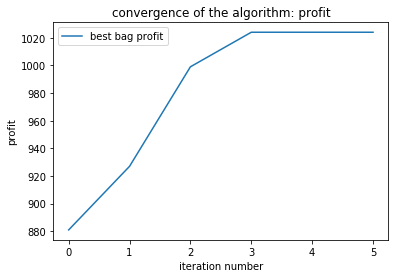

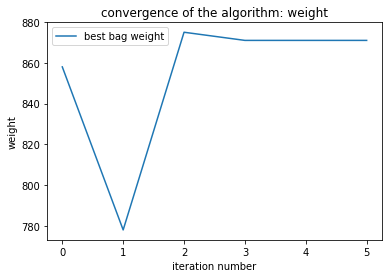

In [11]:
plt.figure()
plt.plot(best_bag_profit_list)
#plt.plot(bad_bag_profit_list)
plt.title('convergence of the algorithm: profit')
plt.xlabel('iteration number')
plt.ylabel('profit')
plt.legend(('best bag profit','worst bag profit'))
plt.show()

plt.figure()
plt.plot(best_bag_weight_list)
#plt.plot(bad_bag_weight_list)
plt.title('convergence of the algorithm: weight')
plt.xlabel('iteration number')
plt.ylabel('weight')
plt.legend(('best bag weight','worst bag weight'))
plt.show()

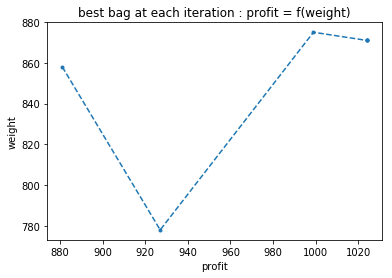

In [12]:
plt.figure()
plt.plot(best_bag_profit_list,best_bag_weight_list,'.--')
plt.xlabel('profit')
plt.ylabel('weight')
plt.title('best bag at each iteration : profit = f(weight)')
plt.show()